In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import re
import math
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.height', 300)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



In [3]:
ef=pd.read_csv('./../out/EventFeature.csv',encoding='utf-16')
ef.head()

,sujet,match,mitemps,all,vapos,vaneg,fortva,arpos,arneg,forar,frus,colere,joie
0,2,1,1,3,1,2,1,3,0,1,1,1,0
1,2,1,2,6,1,5,2,5,1,1,4,1,0
2,2,2,1,10,1,9,0,9,1,1,4,3,1
3,2,2,2,7,1,6,1,5,2,1,3,2,0
4,2,3,1,11,2,9,4,9,2,4,6,2,1


In [4]:
mbf=pd.read_csv('./../out/matbutFeature.csv',encoding='utf-16')
mbf.head()

,sujet,match,mitemps,niveausub,niveaumat,but
0,1,1,1,1,2,-0.5
1,1,1,2,1,2,-0.5
2,1,2,1,1,1,0.0
3,1,2,2,1,1,-0.5
4,1,3,1,1,2,0.0


In [5]:
msf=pd.read_csv('./../out/matstaFeature.csv',encoding='utf-16')
msf.head()

,sujet,match,mitemps,niveausub,niveaumat,but,tirs,tirscadre,possession,tacles,fautes,cartonJaune,cartonRouge,blessure,horsjeu,corners,precisiontir,precisionpasses
0,1,1,1,1,2,-0.5,0.00,0.000000,-0.178218,0.000000,-0.500000,0.0,0,0,0.000000,0.000000,0.000000,-0.229167
1,1,2,1,1,1,0.0,-0.40,0.500000,-0.178218,-0.800000,0.000000,0.0,0,0,0.000000,0.000000,0.990099,0.000000
2,1,3,1,1,2,0.0,-0.40,0.500000,-0.039604,-0.285714,0.000000,0.0,0,0,0.000000,0.000000,0.990099,0.026144
3,2,1,1,4,3,0.0,0.00,0.500000,-0.178218,0.000000,0.000000,0.0,0,0,0.666667,0.000000,0.990099,-0.029070
4,2,2,1,4,5,0.0,-0.75,-0.666667,-0.178218,0.250000,0.666667,0.5,0,0,0.000000,-0.666667,-0.985075,-0.124224


In [2]:
evar=pd.read_csv('./../out/evaRank.csv',encoding='utf-16')
evar.head()

,sujet,match,mitemps,change,eventchange,rgn,rnD,rnI,rnA,rqD,rqI,rqA
0,2,1,1,-1,1,4.0,3.5,5.0,3.0,4.0,3.0,4.5
1,2,1,2,1,1,2.0,3.5,5.0,3.0,2.5,3.0,1.0
2,2,2,1,0,0,5.5,1.5,5.0,6.0,2.5,3.0,6.0
3,2,2,2,1,1,5.5,1.5,2.0,3.0,1.0,3.0,4.5
4,2,3,1,1,1,2.0,5.5,2.0,3.0,5.0,6.0,2.5


In [11]:
evar['order']=range(6)*57

In [13]:
evar_trans=evar[['sujet','rgn','rnD','rqD','rnI','rqI','rnA','rqA','order']].groupby('sujet').transform(lambda x:(x-x.mean())/x.std())
evar_trans.head()

,rgn,rnD,rqD,rnI,rqI,rnA,rqA,order
0,0.288675,0.000000,0.271163,0.912871,-0.408248,-0.408248,0.550482,-1.336306
1,-0.866025,0.000000,-0.542326,0.912871,-0.408248,-0.408248,-1.376205,-0.801784
2,1.154701,-1.118034,-0.542326,0.912871,-0.408248,2.041241,1.376205,-0.267261
3,1.154701,-1.118034,-1.355815,-0.912871,-0.408248,-0.408248,0.550482,0.267261
4,-0.866025,1.118034,0.813489,-0.912871,2.041241,-0.408248,-0.550482,0.801784


In [19]:
format = lambda x: '%.2f' % x
evarcorr=evar_trans.corr().applymap(format)
evarcorr

,rgn,rnD,rqD,rnI,rqI,rnA,rqA,order
rgn,1.00,-0.36,-0.58,0.29,0.28,0.47,0.67,-0.06
rnD,-0.36,1.00,0.70,0.00,0.07,-0.13,-0.35,0.03
rqD,-0.58,0.70,1.00,-0.20,-0.11,-0.37,-0.59,0.01
rnI,0.29,0.00,-0.20,1.00,0.57,0.49,0.37,0.22
rqI,0.28,0.07,-0.11,0.57,1.00,0.38,0.30,0.17
rnA,0.47,-0.13,-0.37,0.49,0.38,1.00,0.66,0.20
rqA,0.67,-0.35,-0.59,0.37,0.30,0.66,1.00,0.08
order,-0.06,0.03,0.01,0.22,0.17,0.20,0.08,1.00


In [18]:
evarcorr.to_csv('/home/wenlu/Documents/Nouveau dossier/corrnote.csv')

In [7]:
evac=pd.read_csv('./../out/evaClass.csv',encoding='utf-16')
evac.head()

,sujet,match,mitemps,rgn,rnD,rnI,rnA,rqD,rqI,rqA,change,eventchange
0,10,1,1,0,1,0,0,1,0,0,1,1
1,10,1,2,0,1,0,0,1,0,0,1,1
2,10,2,1,1,0,0,1,0,0,1,1,1
3,10,2,2,0,1,0,0,1,0,0,1,1
4,10,3,1,1,1,1,1,0,1,1,1,1


In [92]:
classdataset=ef.merge(mbf,on=['sujet','match','mitemps']).merge(evac,on=['sujet','match','mitemps'])
classdataset.head()

,sujet,match,mitemps,all,vapos,vaneg,fortva,arpos,arneg,forar,frus,colere,joie,niveausub,niveaumat,but,rgn,rnD,rnI,rnA,rqD,rqI,rqA,change,eventchange
0,2,1,1,3,1,2,1,3,0,1,1,1,0,4,3,0.0,1,1,1,0,1,0,1,-1,1
1,2,1,2,6,1,5,2,5,1,1,4,1,0,4,3,0.0,0,1,1,0,0,0,0,1,1
2,2,2,1,10,1,9,0,9,1,1,4,3,1,4,5,0.0,1,0,1,1,0,0,1,0,0
3,2,2,2,7,1,6,1,5,2,1,3,2,0,4,5,-0.5,1,0,0,0,0,0,1,1,1
4,2,3,1,11,2,9,4,9,2,4,6,2,1,4,2,0.5,0,1,0,0,1,1,0,1,1


In [93]:
def rellevel(row):
    if (row['niveaumat']-row['niveausub'])<0:
        return 1
    elif (row['niveaumat']-row['niveausub'])==0:
        return 2
    elif (row['niveaumat']-row['niveausub'])>0:
        return 3
classdataset['relniveau']=classdataset.apply(rellevel,axis=1)

In [83]:
allnum=classdataset.groupby(['sujet','match','niveausub','niveaumat','relniveau'], as_index=False)['all'].sum()
allnum.head()

,sujet,match,niveausub,niveaumat,relniveau,all
0,2,1,4,3,1,9
1,2,2,4,5,3,17
2,2,3,4,2,1,21
3,3,1,2,4,3,13
4,3,2,2,2,2,15


In [ ]:
vanum=classdataset.groupby(['sujet','match','niveausub','niveaumat','relniveau'], as_index=False)['all'].sum()
vanum.head()

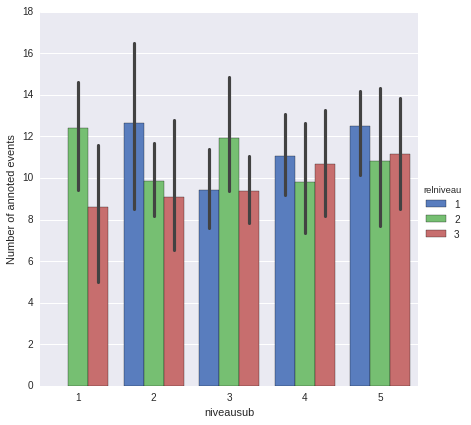

In [47]:
g = sns.factorplot(x="niveausub", y="all", hue="relniveau", data=allnum,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Number of annoted events")

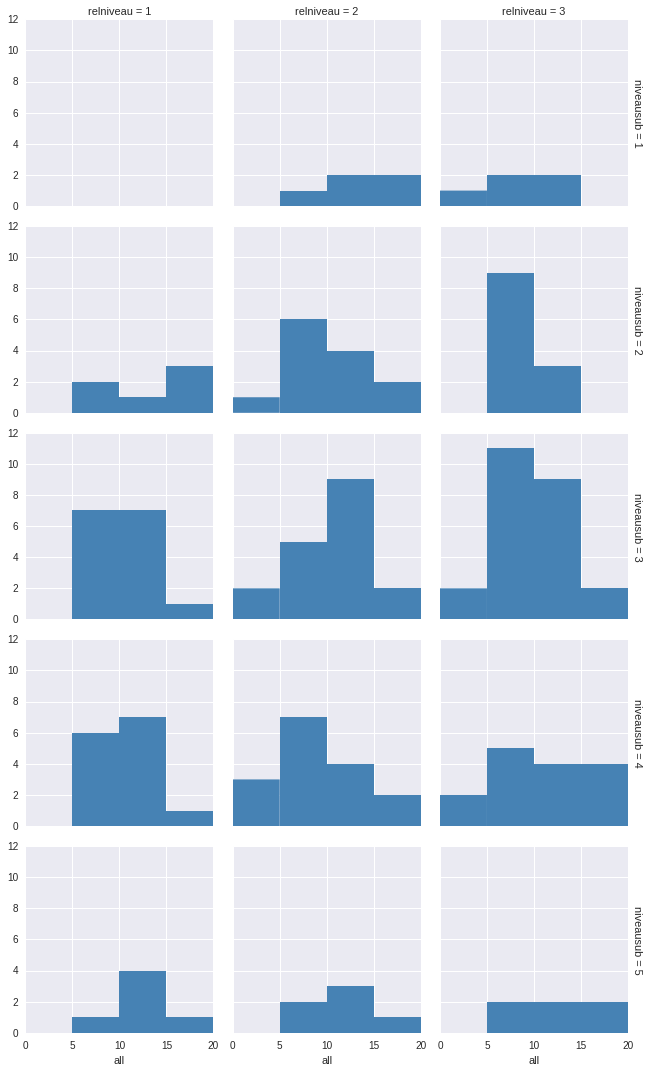

In [48]:
g = sns.FacetGrid(allnum, row="niveausub", col="relniveau", margin_titles=True)
bins = np.linspace(0, 20, 5)
g.map(plt.hist, "all", color="steelblue", bins=bins, lw=0)

In [88]:
regdataset=ef.merge(mbf,on=['sujet','match','mitemps']).merge(evar,on=['sujet','match','mitemps'])
regdataset.to_csv('./../regDataset.csv',encoding='utf-16',index=False)

In [94]:
classdataset_h=classdataset.ix[(classdataset['niveausub']>2),:]

In [95]:
classdataset_h

,sujet,match,mitemps,all,vapos,vaneg,fortva,arpos,arneg,forar,frus,colere,joie,niveausub,niveaumat,but,rgn,rnD,rnI,rnA,rqD,rqI,rqA,change,eventchange,relniveau
0,2,1,1,3,1,2,1,3,0,1,1,1,0,4,3,0.000000,1,1,1,0,1,0,1,-1,1,1
1,2,1,2,6,1,5,2,5,1,1,4,1,0,4,3,0.000000,0,1,1,0,0,0,0,1,1,1
2,2,2,1,10,1,9,0,9,1,1,4,3,1,4,5,0.000000,1,0,1,1,0,0,1,0,0,3
3,2,2,2,7,1,6,1,5,2,1,3,2,0,4,5,-0.500000,1,0,0,0,0,0,1,1,1,3
4,2,3,1,11,2,9,4,9,2,4,6,2,1,4,2,0.500000,0,1,0,0,1,1,0,1,1,1
5,2,3,2,10,1,9,3,8,2,0,6,2,1,4,2,0.666667,0,1,0,0,1,0,0,1,1,1
12,4,1,1,5,2,3,2,5,0,2,3,0,1,3,4,0.000000,0,1,1,1,0,1,0,1,1,3
13,4,1,2,6,4,2,1,6,0,3,2,0,4,3,4,0.000000,0,0,1,0,0,1,0,1,1,3
14,4,2,1,5,2,3,2,5,0,2,2,1,1,3,2,0.666667,1,1,0,1,1,1,1,1,1,1
15,4,2,2,6,3,3,1,6,0,2,3,0,1,3,2,0.800000,0,1,0,1,1,0,0,-1,1,1


In [1]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn import tree
classdataset=classdataset_h
feature_ls=['match',
 'mitemps',
 'all',
 'vapos',
 'vaneg',
 'fortva',
 'arpos',
 'arneg',
 'forar',
 'frus',
 'colere',
 'joie',
 'niveausub',
 'niveaumat',
 'but','relniveau']
X=np.array(classdataset[feature_ls])
Y=np.array(classdataset['rqA']).astype(str)
clf = RandomForestClassifier(n_estimators=20)
clf = clf.fit(X, Y)
# clf =tree.DecisionTreeClassifier()
# clf = clf.fit(X, Y)
#clf = svm.SVC(kernel='linear', C=1)
#clf = svm.SVR()
# clf.fit(X, Y) 
scores = cross_validation.cross_val_score(clf, X, Y, cv=10)
scores
# print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
#               scores.mean(),
#               np.std(scores)))


NameError: name 'classdataset_h' is not defined

In [150]:
list(classdataset.columns.values)

[u'sujet',
 u'match',
 u'mitemps',
 u'all',
 u'vapos',
 u'vaneg',
 u'fortva',
 u'arpos',
 u'arneg',
 u'forar',
 u'frus',
 u'colere',
 u'joie',
 u'niveausub',
 u'niveaumat',
 u'but',
 u'rgn',
 u'rnD',
 u'rnI',
 u'rnA',
 u'rqD',
 u'rqI',
 u'rqA',
 u'change',
 u'eventchange',
 'relniveau']

Feature ranking:
1. feature 6 (0.100411)
2. feature 2 (0.085556)
3. feature 14 (0.079263)
4. feature 4 (0.075591)
5. feature 7 (0.071029)
6. feature 8 (0.070104)
7. feature 9 (0.067793)
8. feature 13 (0.065646)
9. feature 10 (0.059168)
10. feature 3 (0.058475)
11. feature 5 (0.055908)
12. feature 0 (0.048756)
13. feature 11 (0.048431)
14. feature 15 (0.046211)
15. feature 12 (0.042072)
16. feature 1 (0.025586)


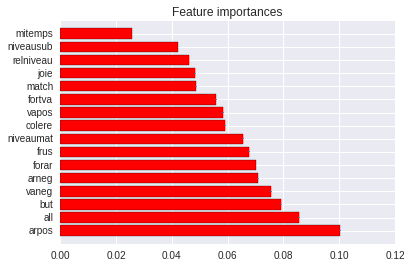

In [151]:

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.yticks(range(X.shape[1]), [feature_ls[i] for i in indices])
plt.ylim([-1, X.shape[1]])
plt.show()

Nearest Neighbors
rgn: 0.576 (std: 0.167)
rnD: 0.656 (std: 0.095)
rnI: 0.481 (std: 0.122)
rnA: 0.539 (std: 0.105)
rqD: 0.638 (std: 0.119)
rqI: 0.522 (std: 0.111)
rqA: 0.578 (std: 0.130)
change: 0.599 (std: 0.046)
eventchange: 0.650 (std: 0.055)
Linear SVM
rgn: 0.667 (std: 0.117)
rnD: 0.678 (std: 0.107)
rnI: 0.521 (std: 0.092)
rnA: 0.590 (std: 0.080)
rqD: 0.743 (std: 0.057)
rqI: 0.586 (std: 0.069)
rqA: 0.666 (std: 0.108)
change: 0.719 (std: 0.003)
eventchange: 0.755 (std: 0.009)
RBF SVM
rgn: 0.506 (std: 0.022)
rnD: 0.619 (std: 0.008)
rnI: 0.494 (std: 0.047)
rnA: 0.570 (std: 0.011)
rqD: 0.550 (std: 0.013)
rqI: 0.550 (std: 0.024)
rqA: 0.498 (std: 0.048)
change: 0.719 (std: 0.003)
eventchange: 0.755 (std: 0.009)
Decision Tree
rgn: 0.630 (std: 0.116)
rnD: 0.649 (std: 0.095)
rnI: 0.465 (std: 0.139)
rnA: 0.528 (std: 0.122)
rqD: 0.734 (std: 0.069)
rqI: 0.530 (std: 0.075)
rqA: 0.574 (std: 0.097)
change: 0.562 (std: 0.110)
eventchange: 0.674 (std: 0.107)
Random Forest
rgn: 0.607 (std: 0.115)
rnD

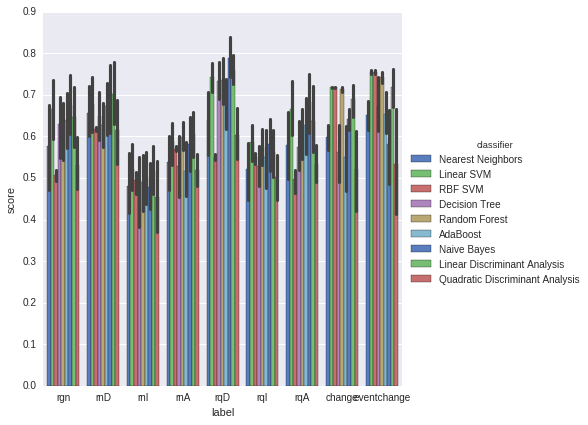

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh
classdataset=classdataset_h

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]
feature_ls=['match',
 'mitemps',
 'all',
 'vapos',
 'vaneg',
 'fortva',
 'arpos',
 'arneg',
 'forar',
 'frus',
 'colere',
 'joie',
 'niveausub',
 'niveaumat',
 'but','relniveau']
label_ls=['rgn',
 'rnD',
 'rnI',
 'rnA',
 'rqD',
 'rqI',
 'rqA',
 'change',
 'eventchange']

X=np.array(classdataset[feature_ls])


clf = RandomForestClassifier(n_estimators=250)
clf = clf.fit(X, Y)
# clf =tree.DecisionTreeClassifier()
# clf = clf.fit(X, Y)
#clf = svm.SVC(kernel='linear', C=1)
#clf = svm.SVR()
# clf.fit(X, Y) 
scores = cross_validation.cross_val_score(clf, X, Y, cv=10)
scores


    # iterate over classifiers
cmpclassifierdf=pd.DataFrame()
for name, clf in zip(names, classifiers):
    print name
    for  labeln in label_ls:
        Y=np.array(classdataset[labeln]).astype(str)
        clf.fit(X, Y)
        scores = cross_validation.cross_val_score(clf, X, Y, cv=10)
        ncmp=pd.DataFrame({'score':scores, 'classifier':name, 'label':labeln})
        cmpclassifierdf=cmpclassifierdf.append(ncmp)
#         print("{0}: {1:.3f} (std: {2:.3f})".format(labeln,
#           scores.mean(),
#           np.std(scores)))
g = sns.factorplot(x="label", y="score", hue="classifier", data=cmpclassifierdf,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("score")

In [148]:
print(__doc__)

import numpy as np

from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint

from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# get some data
# digits = load_digits()
# X, y = digits.data, digits.target
X=np.array(classdataset[feature_ls])
y=np.array(classdataset['rqD']).astype(str)

# build a classifier
clf = RandomForestClassifier()


# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")


# specify parameters and distributions to sample from
param_dist = {"n_estimators"=[20,30,40]
              "max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(1, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.grid_scores_)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.grid_scores_)))
report(grid_search.grid_scores_)

Automatically created module for IPython interactive environment
RandomizedSearchCV took 2.40 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.783 (std: 0.065)
Parameters: {'bootstrap': True, 'min_samples_leaf': 3, 'min_samples_split': 5, 'criterion': 'entropy', 'max_features': 3, 'max_depth': 3}

Model with rank: 2
Mean validation score: 0.779 (std: 0.064)
Parameters: {'bootstrap': True, 'min_samples_leaf': 2, 'min_samples_split': 9, 'criterion': 'gini', 'max_features': 3, 'max_depth': 3}

Model with rank: 3
Mean validation score: 0.767 (std: 0.070)
Parameters: {'bootstrap': True, 'min_samples_leaf': 5, 'min_samples_split': 1, 'criterion': 'gini', 'max_features': 5, 'max_depth': None}

GridSearchCV took 25.33 seconds for 216 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.787 (std: 0.074)
Parameters: {'bootstrap': True, 'min_samples_leaf': 10, 'min_samples_split': 10, 'criterion': 'gini', 'max_features': 3, 'max_depth'

In [146]:
sp_randint(1, 11)